In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import ttest_ind

In [ ]:
df1=pd.read_csv("gender_submission.csv")
df1=pd.read_csv("test.csv")
df1=pd.read_csv("train.csv")

In [ ]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df1.shape

(891, 12)

In [ ]:
df1.isnull().sum()

df1['Age'].fillna(df1['Age'].median(), inplace=True)

df1.duplicated().sum()

df1.drop_duplicates(inplace=True)

df1.dtypes


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,int64


In [ ]:
df1['Fare'] = df1['Fare'].astype(int)
df1['Age'] = df1['Age'].astype(int)

In [ ]:
df1 = df1.drop(['Parch', 'SibSp', 'Cabin'], axis=1)

In [ ]:
df1 = df1.rename(columns={'Embarked': 'target'})


In [ ]:
print(df1['target'].unique())

['S' 'C' 'Q' nan]


In [ ]:
print(df1['target'].isnull().sum())

2


In [ ]:
df1.dropna(inplace=True)

In [ ]:
print(df1['target'].unique())

['S' 'C' 'Q']


In [ ]:


# Identify outliers using IQR method
def find_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Example usage (assuming 'Fare' and 'Age' are the relevant columns):
outliers_fare = find_outliers_IQR(df1, 'Fare')
outliers_age = find_outliers_IQR(df1, 'Age')

print("Outliers in 'Fare':")
print(outliers_fare)
print("\nOutliers in 'Age':")
print(outliers_age)


# Manage outliers (e.g., replace with median)
def manage_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] > upper_bound, df[column].median(), df[column])
    df[column] = np.where(df[column] < lower_bound, df[column].median(), df[column])
    return df


df1 = manage_outliers(df1, 'Fare')
df1 = manage_outliers(df1, 'Age')

# Verify that outliers have been managed
outliers_fare_after = find_outliers_IQR(df1, 'Fare')
outliers_age_after = find_outliers_IQR(df1, 'Age')

print("\nOutliers in 'Fare' after management:")
print(outliers_fare_after)
print("\nOutliers in 'Age' after management:")
outliers_age_after



Outliers in 'Fare':
     PassengerId  Survived  Pclass  \
50            51         0       3   
59            60         0       3   
71            72         0       3   
83            84         0       1   
266          267         0       3   
480          481         0       3   
583          584         0       1   
602          603         0       1   
608          609         1       2   
638          639         0       3   
670          671         1       2   
678          679         0       3   
683          684         0       3   
685          686         0       2   
686          687         0       3   
766          767         0       1   
853          854         1       1   

                                                  Name     Sex  Age  \
50                          Panula, Master. Juha Niilo    male    7   
59                  Goodwin, Master. William Frederick    male   11   
71                          Goodwin, Miss. Lillian Amy  female   16   
83         

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,target
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,CA 2144,9.0,S
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,2651,11.0,C
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,W./C. 6608,34.0,S
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,244310,13.0,S
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,371362,16.0,S
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,363291,20.0,S
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,347077,31.0,S
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,PC 17610,27.0,C
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,4579,8.0,S
217,218,0,2,"Jacobsohn, Mr. Sidney Samuel",male,42.0,243847,27.0,S


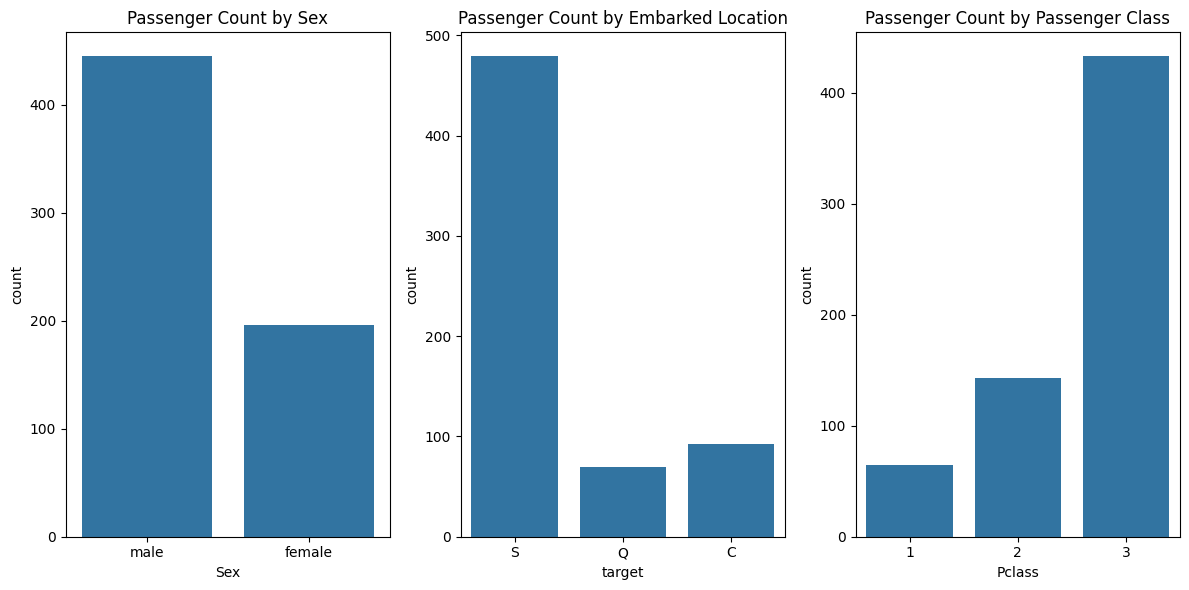

In [ ]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='Sex', data=df1)
plt.title('Passenger Count by Sex')

plt.subplot(1, 3, 2)
sns.countplot(x='target', data=df1)
plt.title('Passenger Count by Embarked Location')

plt.subplot(1, 3, 3)
sns.countplot(x='Pclass', data=df1)
plt.title('Passenger Count by Passenger Class')

plt.tight_layout()
plt.show()


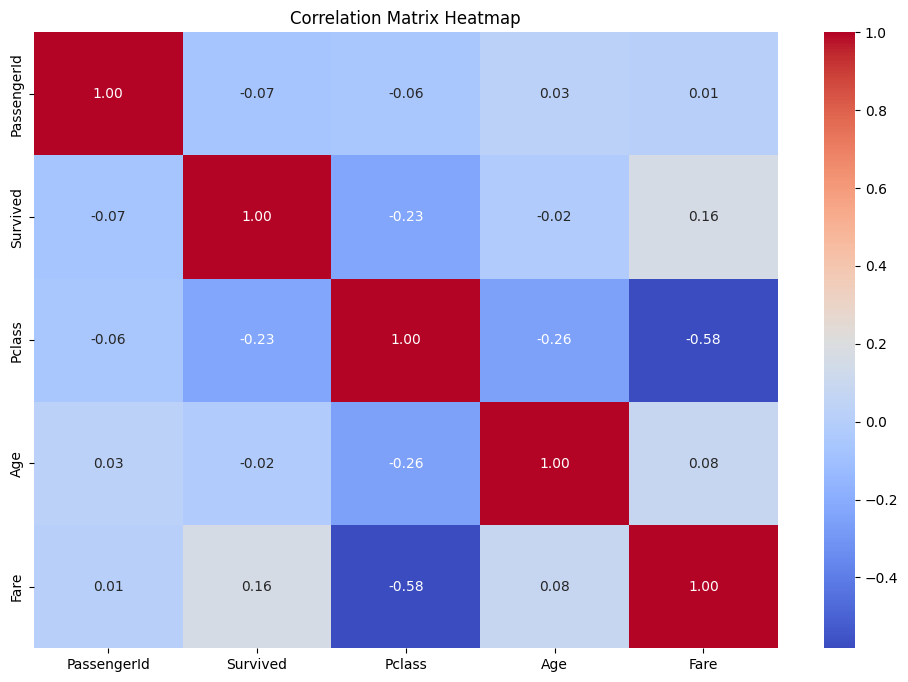

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


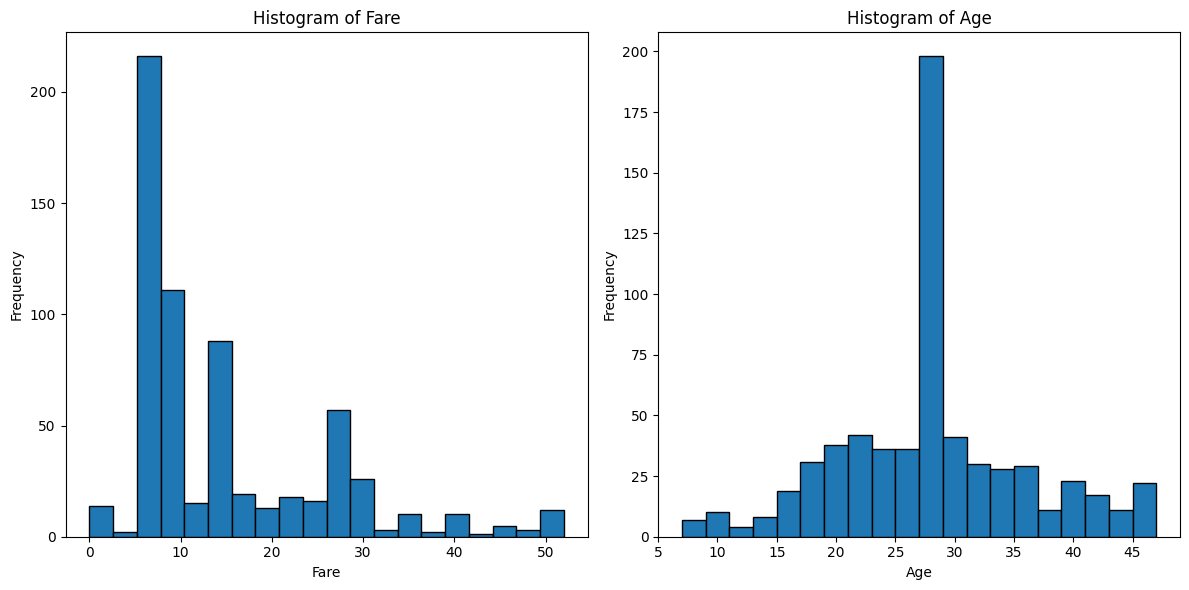

In [ ]:


plt.figure(figsize=(12, 6))
for i, col in enumerate(['Fare', 'Age']):
    plt.subplot(1, 2, i + 1)
    plt.hist(df1[col], bins=20, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Data Exploration and Cleaning:

Data Loading and Initial Exploration: The code begins by loading the Titanic dataset (train.csv) using pandas. It then performs initial data exploration using head(), info(), and shape to understand the structure and size of the data.

Missing Values: The code identifies missing values in the 'Age' column and imputes them using the median age. It also checks for and removes duplicate rows.

Data Type Conversion: The data types of the 'Fare' and 'Age' columns are converted to integers.

Feature Selection/Dropping: The code drops the 'Parch', 'SibSp', and 'Cabin' columns, potentially due to their irrelevance or high missing values. The 'Embarked' column is renamed to 'target', suggesting it might be the target variable.

Handling Missing Values in Target: Missing values in the 'target' column are identified and removed using dropna().

Outlier Detection and Management: The code defines functions to identify and manage outliers in the 'Fare' and 'Age' columns using the IQR method. Outliers are replaced with the median value of the respective column.

Data Visualization and Analysis:

Count Plots: The code generates count plots for 'Sex', 'target' (Embarked), and 'Pclass' to visualize the distribution of passengers across these categories.

Correlation Matrix: A correlation matrix heatmap is created to visualize the relationships between numerical features. This helps in identifying potential multicollinearity or dependencies between variables.

Histograms: Histograms are plotted for the 'Fare' and 'Age' columns to examine their distributions. This helps in understanding the central tendency, spread, and skewness of these variables.

Overall Observations:

The dataset contains information about passengers on the Titanic, including demographics, ticket details, and survival status.
Missing values and outliers were identified and addressed using appropriate techniques.
Data visualizations revealed patterns and relationships among variables, such as the distribution of passengers across different categories and the correlation between numerical features.
Feature selection was performed to drop potentially irrelevant or redundant columns.
The analysis focused on understanding passenger demographics, ticket information, and their relationship with the target variable (survival or embarked location).